<a href="https://colab.research.google.com/github/racode23/Tomto_deep_learning_project/blob/main/Tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0-beta0
!pip install tensorflow_hub
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow import keras
keras.utils.custom_object_scope

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta0


keras.src.saving.object_registration.CustomObjectScope

In [ ]:
pd.set_option("display.precision", 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_root='/content/drive/MyDrive/DATASET/train'


In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE
    )

/content/drive/MyDrive/DATASET/train
Found 2007 images belonging to 10 classes.
Found 8036 images belonging to 10 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(),
 key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 10)
['Tomato___Bacterial_Spot' 'Tomato___Early_Blight' 'Tomato___Late_Blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_Leaf_Spot'
 'Tomato___Spider_Mites Two-Spotted_Spider_Mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_Mosaic_Virus'
 'Tomato___Healthy']


In [ ]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    output_shape=[1280],
    trainable=False),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')])


In [ ]:
model.build([None, 224, 224, 3])
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
hist = model.fit(
                 train_generator,
                 epochs=20,
                  verbose=1,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=valid_generator,
                 validation_steps=val_steps_per_epoch).history

Epoch 1/20
252/252 [==============================] - 439s 2s/step - loss: 1.1246 - acc: 0.6222 - val_loss: 0.5948 - val_acc: 0.8281
Epoch 2/20
252/252 [==============================] - 344s 1s/step - loss: 0.6315 - acc: 0.7858 - val_loss: 0.4991 - val_acc: 0.8356
Epoch 3/20
252/252 [==============================] - 336s 1s/step - loss: 0.5090 - acc: 0.8333 - val_loss: 0.4142 - val_acc: 0.8724
Epoch 4/20
252/252 [==============================] - 333s 1s/step - loss: 0.4735 - acc: 0.8398 - val_loss: 0.3742 - val_acc: 0.8859
Epoch 5/20
252/252 [==============================] - 317s 1s/step - loss: 0.4309 - acc: 0.8547 - val_loss: 0.3605 - val_acc: 0.8834
Epoch 6/20
252/252 [==============================] - 330s 1s/step - loss: 0.3999 - acc: 0.8655 - val_loss: 0.3552 - val_acc: 0.8794
Epoch 7/20
252/252 [==============================] - 330s 1s/step - loss: 0.3835 - acc: 0.8718 - val_loss: 0.3596 - val_acc: 0.8734
Epoch 8/20
252/252 [==============================] - 329s 1s/step - 

In [ ]:
tf.saved_model.save(model, "saved_model_path")

In [ ]:
imported_model = tf.saved_model.load("saved_model_path")

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

1/1 [==============================] - 1s 1s/step
Prediction results for the first elements


,Tomato___Bacterial_Spot,Tomato___Early_Blight,Tomato___Late_Blight,Tomato___Leaf_Mold,Tomato___Septoria_Leaf_Spot,Tomato___Spider_Mites Two-Spotted_Spider_Mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_Mosaic_Virus,Tomato___Healthy
0,2.56106923e-05,0.14119798,0.84910637,0.00966309,0.00000072,0.00000017,0.00000476,1.18266325e-06,1.13444465e-09,3.75181928e-14
1,1.23678504e-07,0.00006017,0.99993914,0.00000007,0.00000026,0.00000004,0.00000002,5.07334548e-08,5.97993433e-09,1.11540238e-07
2,3.74092770e-06,0.37353721,0.27199072,0.26186430,0.09259979,0.00000093,0.00000297,4.71788724e-07,7.09787829e-09,4.14458778e-09
3,9.58469272e-01,0.00057009,0.00000868,0.00000961,0.04061959,0.00007909,0.00023498,2.05409606e-06,1.84827201e-07,6.39027303e-06
4,8.97622688e-12,0.00000034,0.00000001,0.00000054,0.00000080,0.00004755,0.00009936,1.31055888e-09,1.33294904e-07,9.99851227e-01


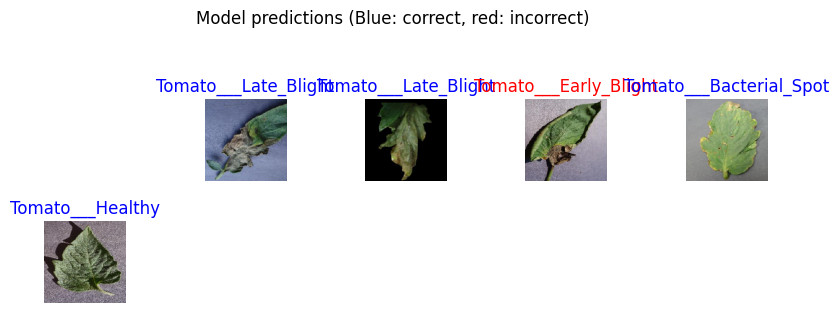

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(5):
  plt.subplot(6,5,n+2)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")

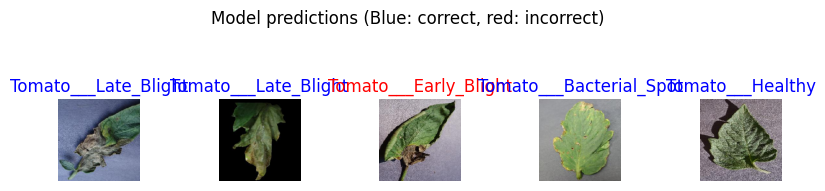

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(5):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (Blue: correct, red: incorrect)")

Text(0.5, 1.0, 'Tomato___Early_Blight')

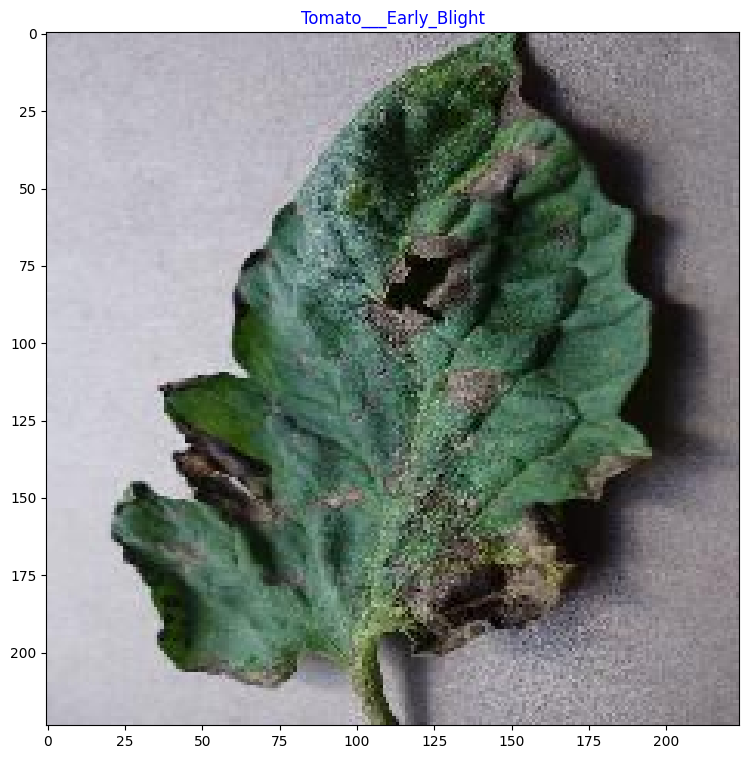

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
n=31
plt.imshow(val_image_batch[n])
color = "blue" if predicted_ids[n] == true_label_ids[n] else "red"
plt.title(predicted_labels[n].title(), color=color)